<a href="https://colab.research.google.com/github/k3robotics/ML-Essentials/blob/main/IntermediateLinAlg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

#### Eigenvectors and Eigenvalues
*  Eigenvectors will not change in orientation or magnitude if a transformation matrix is applied to an original matrix, such as an image broken down into a pixel grid.
* The eigenvalue of an eigenvector describes the tranformation magnitude of the eigenvector. For example, if a 'flipping matrix' is applied to an original matrix and there are two vectors orthogonal to each other, then only the vector on the x-axis will change direction. This is still an eigenvector because the angle of the vector has not changed but the orientation has changed. However, the original eigenvalue was 1 and when the vector is rotated 180 degrees the eigenvalue becomes -1.  If a transformation was applied and the x-axis eigenvector was shortened to half its original magnitude then the eigenvalue would change to 0.5. Likewise, if the eigenvector was doubled in magnitude then the eigenvalue would be 2. If a shearing matrix is applied then the eigenvector oriented on the y-axis is not an eigenvector because the angle of the vector has been taken off span (vertical and then not vertical).
* The eigenvalue is a scalar multiple that tells us how an eigenvector is adjusted if it even is adjusted.


* We can plot some vectors and see how applying matrices to these vectors transforms them. Then we can find the eigenvectors and eigenvalues of the matrices that are applied to the vectors.


In [3]:
v = np.array([3, 1])
v

array([3, 1])

We can plot $\vec{v}$ using Hadrien Jean's `plotVectors` function.

In [4]:
def plotVectors(vecs, cols, alpha=1):
  """
  Plot a set of vectors.

  Parameters
  ----------
  vecs: array-like
    Coordinates of the vectors to plot. Each vectors is in an array. For example, [[1, 3], [2, 2]] can be used to plot 2 vectors.
  cols: array-like
    Colors of the vectors. For example, ['red', 'blue'] will display the first vector in red and the second in blue.
  alpha: float
    Opacity of the vectors.

  Returns:

    fig : an instance of matplotlib.figure.Figure
      The figure of the vectors.
  """
  plt.figure()
  plt.axvline(x=0, color='#A9A9A9', zorder=0)
  plt.axhline(y=0, color='#A9A9A9', zorder=0)

  for i in range(len(vecs)):
    x = np.concatenate([[0, 0], vecs[i]])
    plt.quiver([x[0]],
               [x[1]],
               [x[2]],
               [x[3]],
               angles='xy', scale_units='xy', scale=1, color=cols[i], alpha=alpha)


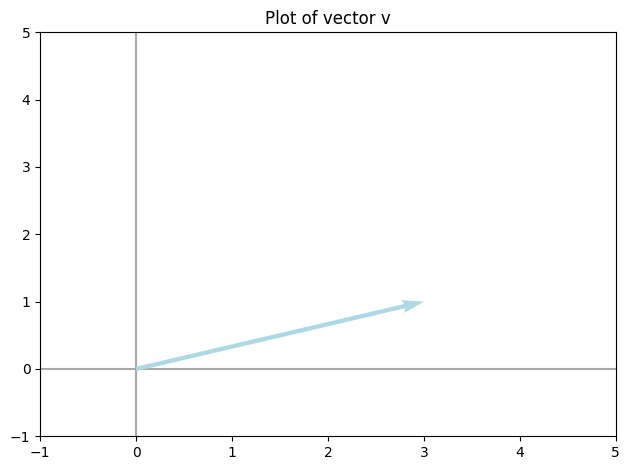

In [5]:
# plot vector v
plotVectors([v], cols=['lightblue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Plot of vector v')
plt.tight_layout()
plt.show()

* By applying a matrix to a vector(i.e., perform a matrix-vector multiplication) we can linearly transform the vector, e.g., rotate it or rescale it.
* However, applying an Identity Matrix will not transform the vector at all.

In [6]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [7]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [8]:
v == Iv

array([ True,  True])

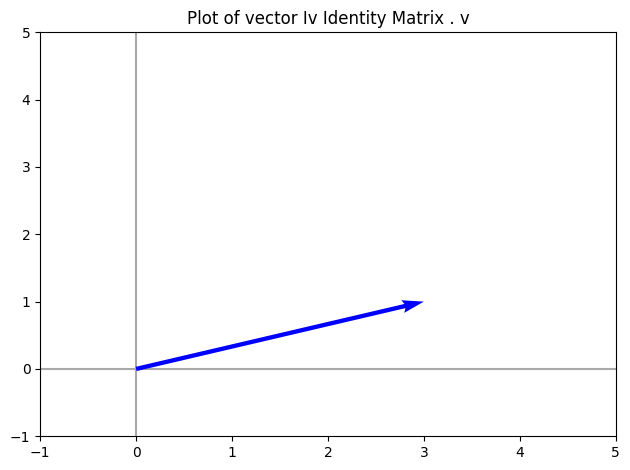

In [9]:
plotVectors([Iv], cols=['blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Plot of vector Iv Identity Matrix . v')
plt.tight_layout()
plt.show()

*  Now we can apply a non-identity matrix, $\matrix{A}$ to $\vec{v}$ and see how it is transformed.

In [10]:
A = np.array([ [-1, 4], [2, -2] ])
A

array([[-1,  4],
       [ 2, -2]])

In [11]:
Av = np.dot(A, v)
Av

array([1, 4])

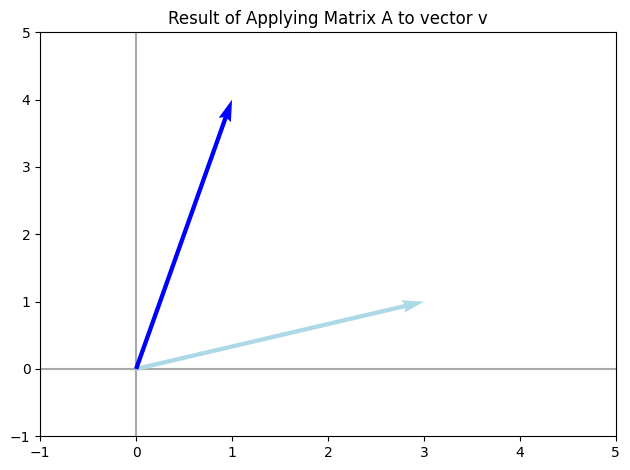

In [12]:
plotVectors([v, Av], cols=['lightblue', 'blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Result of Applying Matrix A to vector v')
plt.tight_layout()
plt.show()

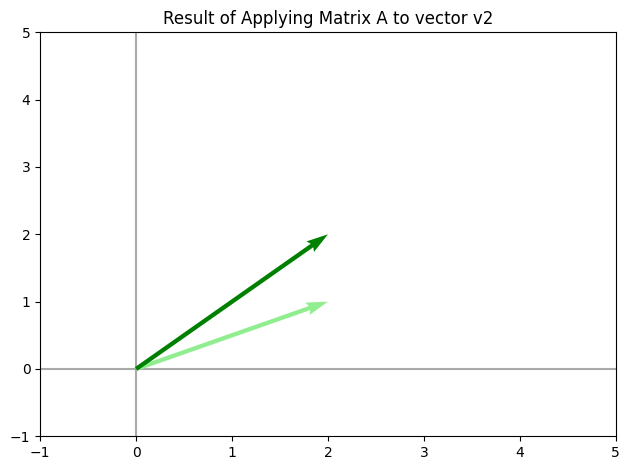

In [13]:
# another example of applying a matrix to a vector
v2 = np.array([2, 1])
plotVectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Result of Applying Matrix A to vector v2')
plt.tight_layout()
plt.show()

*  Now we can concatenate several vectors together into a matrix $\matrix{V}$, where each column in the matrix is a separate vector. If we apply linear transformations to $\matrix{V}$ the transformations will be applied independently to each column (vector).

In [14]:
v

array([3, 1])

In [15]:
# we need to convert an array to 2D to transpose into a column vector
np.matrix(v).T

matrix([[3],
        [1]])

In [16]:
# create some more vectors
v3 = np.array([-3, -1]) # mirror image of x over both axes
v4 = np.array([-1, 1])

In [17]:
# Now we can build V by concatenating vectors v - v4 as column matrices
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                    axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [18]:
# if we apply the identity matrix to V then we should just get V back
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [19]:
# if we apply the matrix A to matrix V then A will trnasform all of the four columns
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [20]:
# function to convert column of matrix to a 1D vector:
def vectorfy(mtrx, clmn):
  return np.array(mtrx[:,clmn]).reshape(-1)

In [21]:
vectorfy(V, 0)

array([3, 1])

In [22]:
vectorfy(V, 0) == v

array([ True,  True])

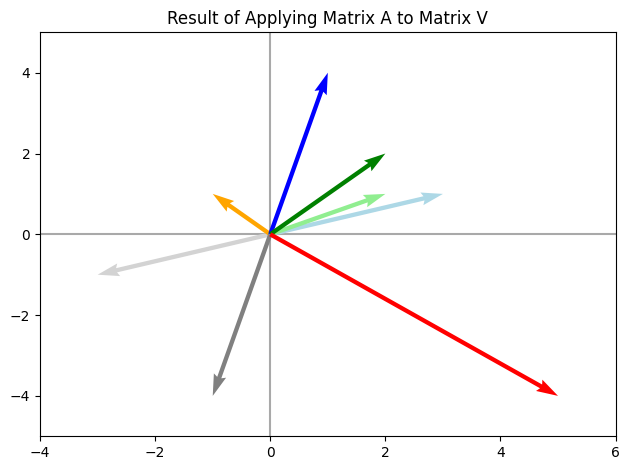

In [23]:
plotVectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgrey', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
plt.ylim(-5, 5)
plt.title('Result of Applying Matrix A to Matrix V')
plt.tight_layout()
plt.show()


*  An **eigenvector** (*eigen* is German for 'typical'; or 'characteristic vector') is a special vector $\vec{v}$ such that when it is transformed by some matrix ($\matrix{A}$), the product $\matrix{A}\vec{v}$ has the exact same direction as $\vec{v}$.
*  An **eigenvalue** is a scalar($\lambda$) that simply scales the eigenvector $\vec{v}$ such that the following equation is satisfied:
\begin{equation*}
\matrix{A}\vec{v} = \lambda\vec{v}
\end{equation*}

In [24]:
# take matrix A that we are applying
A

array([[-1,  4],
       [ 2, -2]])

*  The NumPy `eig()` method returns a tuple of:
  *  a vector of eigenvalues
  *  a matrix of eigenvectors
* **The eigenvalues and eigenvectors are characteristic of the matrix that we apply** to a given vector or matrix.

In [25]:
lambdas, V = np.linalg.eig(A)

*  The matrix returned will have as many eigenvectors as there are columns of $\matrix{A}$.

In [26]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

* Along with a corresponding eigenvalue for each eigenvector.

In [27]:
lambdas # these lambdas are lambdas that satisfy the equation Av = lambda v

array([ 1.37228132, -4.37228132])

* Now we should confirm that indeed $\matrix{A}\vec{v} = \lambda\vec{v}$ for the first eigenvector:

In [28]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [29]:
lambdaa = lambdas[0] # ** careful - lambda is a reserved word in Python
lambdaa

1.3722813232690143

In [30]:
Av = np.dot(A, v) # the Av on the left side of the equation
Av

array([1.18031462, 0.70000958])

In [31]:
lambdaa * v # the lambda v on the right side of the equation

array([1.18031462, 0.70000958])

*  To confirm that these are indeed eigenvectors we can plot them.
*  After applying the transformation($\matrix{A}$) the vector is on the exact same orientation as $\vec{v}$ but a different $L^2$ norm. The difference between the two vectors is the eigenvalue for that eigenvector.
*  So the resulting vector is 1.37 times the original vector.

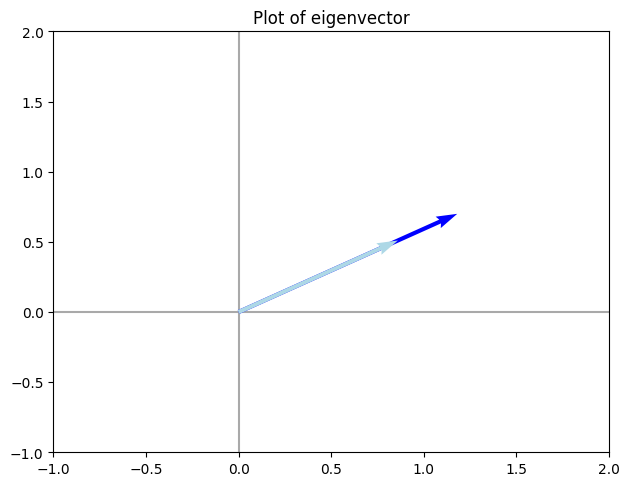

In [32]:
plotVectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.tight_layout()
plt.title('Plot of eigenvector')
plt.show()

*  Now we can complete for the second vector of $\matrix{A}$

In [33]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [34]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [35]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [36]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

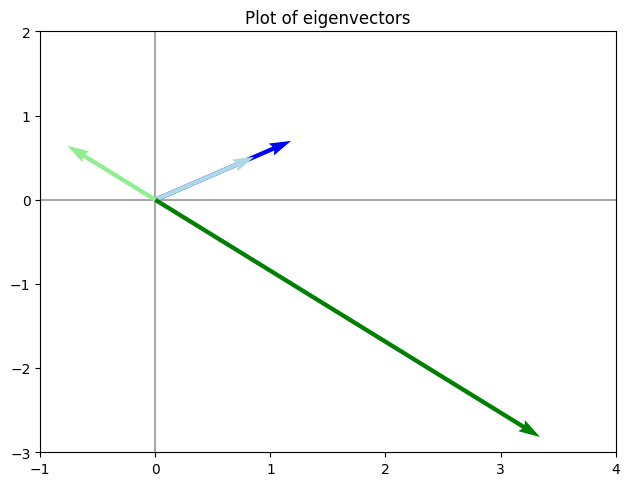

In [37]:
plotVectors([Av, v, Av2, v2], ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
plt.ylim(-3, 2)
plt.tight_layout()
plt.title('Plot of eigenvectors')
plt.show()

*  We can do the same as above using PyTorch `eig()` method.

In [38]:
A

array([[-1,  4],
       [ 2, -2]])

In [39]:
A_p = torch.tensor([ [-1, 4], [2., -2] ])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [40]:
eigs = torch.linalg.eig(A_p)
eigs

torch.return_types.linalg_eig(
eigenvalues=tensor([ 1.3723+0.j, -4.3723+0.j]),
eigenvectors=tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]]))

In [41]:
v_p = eigs.eigenvectors[:, 0]
v_p.real # convert to real values

tensor([0.8601, 0.5101])

In [42]:
lambda_p = eigs.eigenvalues[0]
lambda_p.real # convert to real values

tensor(1.3723)

In [43]:
Av_p = torch.matmul(A_p, v_p.real)
Av_p

tensor([1.1803, 0.7000])

In [44]:
lambda_p.real * v_p.real

tensor([1.1803, 0.7000])

In [45]:
v2_p = eigs.eigenvectors[:, 1]
v2_p.real # convert to real values

tensor([-0.7645,  0.6446])

In [46]:
lambda2_p = eigs.eigenvalues[1]
lambda2_p.real # convert to real values

tensor(-4.3723)

In [47]:
Av2_p = torch.matmul(A_p, v2_p.real)
Av2_p

tensor([ 3.3428, -2.8182])

In [48]:
lambda2_p.real * v2_p.real

tensor([ 3.3428, -2.8182])

#### Review of Eigenvectors and Eigenvalues
*  The eigenvalue of an eigenvector corresponds to the change in length (size) of the vector when a matrix is applied to it. If the length remains the same, the eigenvalue is 1. If it doubles, the eigenvalue is 2; if it halves, the eigenvalue is 0.5. The eigenvalue provides information about how the matrix operation transforms the eigenvector.
*   Eigenvalues are represented as scalar values, typically denoted by the Greek lowercase letter lambda. They indicate how the matrix transformation scales or stretches the corresponding eigenvectors.
*   An eigenvector is a vector that does not change direction when a matrix is applied. It remains oriented in the same direction.
*  An eigenvector is a vector that retains its direction after transformation by a matrix. The orientation or direction of the vector remains the same, although the corresponding eigenvalue may scale its length.
*   In a three-dimensional matrix, there will be three eigenvectors and three corresponding eigenvalues. The number of eigenvectors and eigenvalues matches the number of dimensions of the matrix.

#### Higher Dimensional Eigenvectors

In [49]:
X = np.array([ [25, 2, 9], [5, 26, -5], [3, 7, -1] ])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [50]:
lambdas_X, V_X = np.linalg.eig(X)

In [51]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [52]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

*  Confirm $\matrix{X}\vec{v} = \lambda\vec{v}$

In [53]:
v_X = V_X[:, 0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [54]:
lambda_X = lambdas_X[0]
lambda_X

29.676232023948902

In [55]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [56]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [57]:
# using pyTorch
X_t = torch.tensor([ [25, 2, 9], [5, 26, -5], [3, 7, -1] ], dtype=torch.float64)
X_t

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]], dtype=torch.float64)

In [58]:
L, V = torch.linalg.eig(X_t)

In [59]:
L.real

tensor([29.6762, 20.6212, -0.2974], dtype=torch.float64)

In [60]:
V.real

tensor([[-0.7118, -0.6502, -0.3422],
        [-0.6665,  0.7446,  0.2379],
        [-0.2217,  0.1509,  0.9090]], dtype=torch.float64)

In [61]:
V_v = V[:, 0] # get the first column eigenvector
V_v.real

tensor([-0.7118, -0.6665, -0.2217], dtype=torch.float64)

In [62]:
L_lambda = L[0] # get the first eigenvalue
L_lambda.real

tensor(29.6762, dtype=torch.float64)

*  Confirm $\matrix{X}\vec{v} = \lambda\vec{v}$

In [63]:
torch.matmul(X_t, V_v.real)

tensor([-21.1223, -19.7798,  -6.5792], dtype=torch.float64)

In [64]:
L_lambda.real * V_v.real

tensor([-21.1223, -19.7798,  -6.5792], dtype=torch.float64)

#### Matrix Determinants and Decomposition
* The Determinant of a 2x2 matrix.
  * The determinant allows us to map a **square** matrix to a scalar.
  * This will enable us to determine if a matrix can be inverted.
  * For a matrix $\matrix{X}$, denoted as $\det({X})$ if:
    *  $\det({X}) = 0$ then:
      *  matrix $\matrix{X^{-1}}$ cannot be computed because: $\matrix{X^{-1}}$ is $\frac{1}{\det({X})} = \frac{1}{\color{red}{0}}$
      *  this also means $\matrix{X}$ is **singular** and contains linearly-dependent columns(lines described by x are parallel).
* Calculating the determinant of a 2x2 matrix:
\begin{equation*}
\matrix{X} = \begin{bmatrix}
\color{orange}{a} & \color{green}{b} \\
\color{brown}{c} & \color{purple}{d}
\end{bmatrix}
\end{equation*}

\begin{equation*}
\det{(X)} = |\matrix{X}| = \color{orange}{a}\color{purple}{d} - \color{green}{b}\color{brown}{c}
\end{equation*}
* For example:
\begin{equation*}
\matrix{X} = \begin{bmatrix}
\color{orange}{4} & \color{green}{2} \\
\color{brown}{-5} & \color{purple}{-3}
\end{bmatrix}
\end{equation*}
\
\begin{equation*}
\det{(X)} = |\matrix{X}| = \color{orange}{4}\color{purple}{(-3)} - \color{green}{2}\color{brown}{(-5)} = \color{black}{-12 + 10 = -2}
\end{equation*}

In [65]:
# example using NumPy
X = np.array([ [4, 2], [-5, -3] ])
X

array([[ 4,  2],
       [-5, -3]])

In [66]:
int(np.linalg.det(X))

-2

#### Example where the determinant is 0 due to linearly dependant columns
*  The first column is a multiple of the second column. If we multiply column 2 by  -4 then we get column 1.
*  This makes this matrix a singular matrix and we cannot take the inverse.

\begin{equation*}
\matrix{N} = \begin{bmatrix}
\color{orange}{-4} & \color{green}{1} \\
\color{brown}{-8} & \color{purple}{2}
\end{bmatrix}
\end{equation*}
\
\begin{equation*}
\det{(N)} = |\matrix{N}| = \color{orange}{-4}\color{purple}{(2)} - \color{green}{1}\color{brown}{(-8)} = \color{black}{-8 + 8 = 0}
\end{equation*}

In [67]:
N = np.array([ [-4, 1], [-8, 2] ])
N

array([[-4,  1],
       [-8,  2]])

In [68]:
int(np.linalg.det(N))

0

In [69]:
# this line of code will cause a 'singular matrix' error
#Ninv = np.linalg.inv(N)

In [70]:
# using pyTorch
N_t = torch.tensor([ [-4, 1], [-8, 2] ], dtype=torch.float64)
N_t

tensor([[-4.,  1.],
        [-8.,  2.]], dtype=torch.float64)

In [71]:
torch.linalg.det(N_t)

tensor(-0., dtype=torch.float64)

#### The Determinants of Larger Matrices
*  To generalize determinants we use recursion.
*  Remember we can only calculate the determinant of a square matrix.
*  A 5x5 matrix will have 4 rounds of recursion.
*  Example: the $\matrix{X_{1,1}}$ are the elements that are not in the same row or column as $x_{1,1}$.
*  The equation alternates + and -

\begin{equation*}
\matrix{X} =
\begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} & x_{1,5} \\
x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} & x_{2,5} \\
x_{3,1} & x_{3,2} & x_{3,3} & x_{3,4} & x_{3,5} \\
x_{4,1} & x_{4,2} & x_{4,3} & x_{4,4} & x_{4,5} \\
x_{5,1} & x_{5,2} & x_{5,3} & x_{5,4} & x_{5,5}
\end{bmatrix} = \\
x_{1,1}\det(\matrix{X_{1,1}}) - x_{1,2}\det(\matrix{X_{1,2}}) + x_{1,3}\det (\matrix{X_{1,3}}) - x_{1,4}\det(\matrix{X_{1,4}}) + x_{1,5}\det(\matrix{X_{1,5}})
\end{equation*}

*  As an example, we can calculate the determinate of a 3x3 matrix.
*  3 rows means we will do 2 rounds of recursion.

\begin{equation*}
\matrix{X} =
\begin{bmatrix}
\color{orange}{1} & \color{green}{2} & \color{purple}{4} \\
\color{black}{2} & \color{black}{-1} & \color{black}{3} \\
\color{black}{0} & \color{black}{5} & \color{black}{1} \\
\end{bmatrix}
= \color{orange}{x_{1,1}}\det(\matrix{\color{orange}{X_{1,1}}}) - \color{green}{x_{1,2}}\det(\matrix{\color{green}{X_{1,2}}}) + \color{purple}{x_{1,3}}\det (\matrix{\color{purple}{X_{1,3}}})
\end{equation*}

\begin{equation*}
 =
\color{orange}{1}
\begin{bmatrix}
\color{black}{-1} & \color{black}{3} \\
\color{black}{5} & \color{black}{1} \\
\end{bmatrix}
- \color{green}{2}
\begin{bmatrix}
\color{black}{2} & \color{black}{3} \\
\color{black}{0} & \color{black}{1} \\
\end{bmatrix}
+ \color{purple}{4}
\begin{bmatrix}
\color{black}{2} & \color{black}{-1} \\
\color{black}{0} & \color{black}{5} \\
\end{bmatrix}
= \color{orange}{1}(-1.1 - 3.5) - \color{green}{2}(2.1 - 3.0) + \color{purple}{4}(2.5 - (-1)(0)) = \color{orange}{-16} \color{green}{-4} \color{purple}{+40} \color{black}{= 20}
\end{equation*}

In [72]:
# using NumPy
X = np.array([ [1, 2, 4], [2, -1, 3], [0, 5, 1] ])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [73]:
np.linalg.det(X)

19.999999999999996

#### Determinants and Eigenvalues
*  The determinant of $\matrix{X}$ is equal to the product of all eigenvalues of $\matrix{X}$
*  The absolute value of the determinant of $\matrix{X}$($|\det\matrix{(X)}|$) quatifies the volume change as a result of applying $\matrix{X}$.
  *  If $\det{\matrix{(X)}} = 0$, then $\matrix{X}$ collapses space completely in at least one dimension thus eliminating all volume.
  *  If $0 \lt \det{\matrix{(X)}} \lt 1$, then $\matrix{X}$ contracts volume to some extent.
  *  If $\det{\matrix{(X)}} = 1$, then $\matrix{X}$ preserves the volume exactly.
  *  If $\det{\matrix{(X)}} \gt 1$, then $\matrix{X}$ expands the volume.




In [74]:
# example of rule : det(X) = product of eigenvalues of X
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [75]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [76]:
np.product(lambdas)

19.99999999999999

In [77]:
# Calculate the absolute value of the determinate of X
np.abs(np.product(lambdas))

19.99999999999999

In [78]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

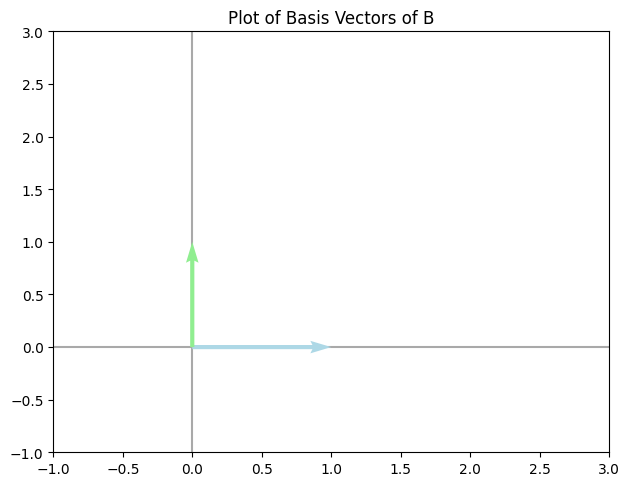

In [79]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1)], ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.tight_layout()
plt.title('Plot of Basis Vectors of B')
plt.show()

In [80]:
# Now let's apply a transformation to matrix B
N


array([[-4,  1],
       [-8,  2]])

In [81]:
np.linalg.det(N) # this is a singular matrix where the determinant is 0

0.0

*  If we apply the matrix N to the matrix B, because the matrix N in singular where it has no determinant and cannot be inverted, it collapses the dimensionality of the matrix down to a single dimension. Therefore, any vectors would be reduced to one dimension by the singular matrix N.

In [82]:
NB = np.dot(N, B)
NB

array([[-4,  1],
       [-8,  2]])

*  In this example if B describes the area of a square, then after the application of matrix N with a determinant of 0, there is no area described by the result. It is just a line.

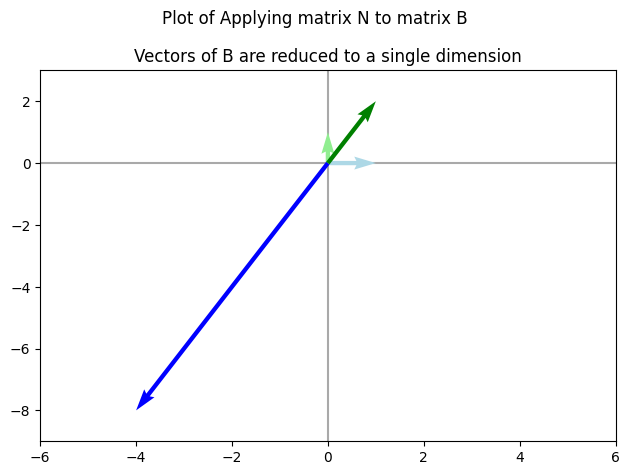

In [83]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)], ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
plt.ylim(-9, 3)
plt.suptitle('Plot of Applying matrix N to matrix B')
plt.title('Vectors of B are reduced to a single dimension')
plt.tight_layout()
plt.show()

In [84]:
# Now lets try one with an Identity Matrix this should preserve the volume exactly
I

array([[1, 0],
       [0, 1]])

In [85]:
np.linalg.det(I) # determinate of 1 -> preserves the volume exactly

1.0

In [86]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

* If we think of the basis vectors as describing a square, then the area of the square is the same before and after applying the identity matrix.

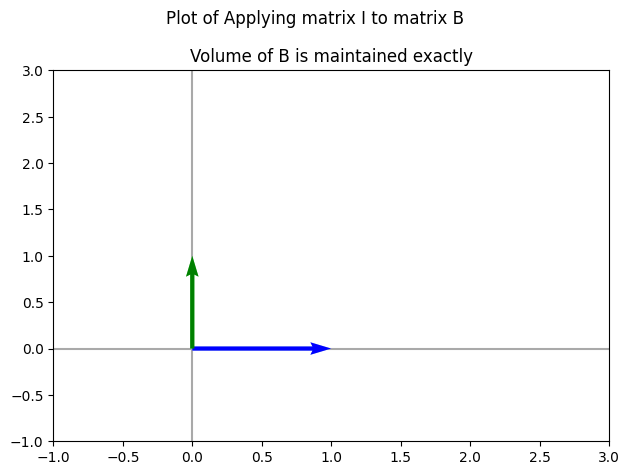

In [87]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)], ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.suptitle('Plot of Applying matrix I to matrix B')
plt.title('Volume of B is maintained exactly')
plt.tight_layout()
plt.show()

In [88]:
# Now let's try one with a determinant of -1
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [89]:
np.linalg.det(J)

-1.0

In [90]:
# Take the absolute value
np.abs(np.linalg.det(J))

1.0

In [91]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

*  The overall area described by B is constant even though the shape is transformed.
*  The absolute value of the determinant of  X ( |det(X)| ) quatifies the volume change as a result of applying  X:
  *  If  det(X)=1 , then  X  preserves the volume exactly.

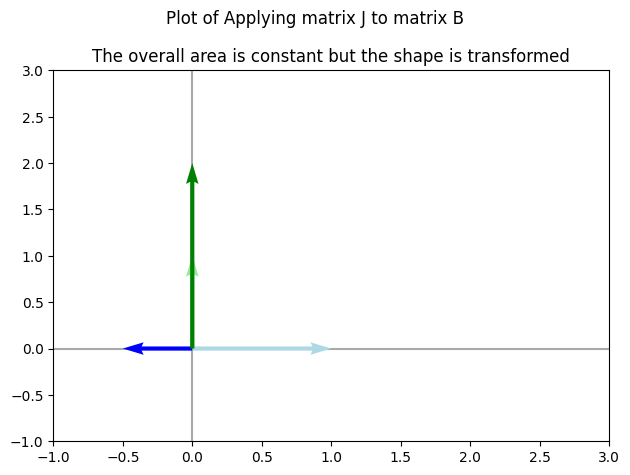

In [92]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)], ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.suptitle('Plot of Applying matrix J to matrix B')
plt.title('The overall area is constant but the shape is transformed')
plt.tight_layout()
plt.show()

* If  det(X)>1 , then  X  expands the volume. We double I and check the result.

In [93]:
# Now we can double the values in the identity matrix and apply this matrix to matrix B
dbl_I = I*2
dbl_I

array([[2, 0],
       [0, 2]])

In [94]:
np.linalg.det(dbl_I)

4.0

In [95]:
dbl_IB = np.dot(dbl_I, B)
dbl_IB

array([[2, 0],
       [0, 2]])

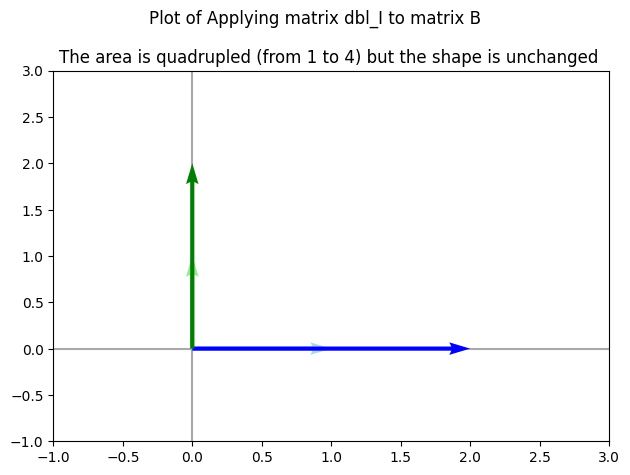

In [96]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(dbl_IB, 0), vectorfy(dbl_IB, 1)], ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.suptitle('Plot of Applying matrix dbl_I to matrix B')
plt.title('The area is quadrupled (from 1 to 4) but the shape is unchanged ')
plt.tight_layout()
plt.show()

#### Eigendecomposition
*  The decomposition of a matrix into eigenvectors and eigenvalues reveals characteristics of the matrix, e.g.:
  *  A matrix is singular if and only if any of its eigenvalues are zero.
  *  Under specific conditions(check out $\S$2.7 of [Goodfellow](https://https://www.deeplearningbook.org/) et al., 2016), we can optimize quadratic expressions:
    *  Maximum of $f(x) =$ largest eigenvalue
    *  Minimum of $f(x) =$ smallest eigenvalue
*  The **eigendecomposition** of some matrix $\matrix{A}$ is:
\begin{equation*}
\matrix{A} = \matrix{V}\Lambda\matrix{V^{-1}}
\end{equation*}
  Where:
    *  $\matrix{V}$ is the concatenation of all eigenvectors of $\matrix{A}$
    *  $\Lambda$(upper case $\lambda$) is the diagonal matrix diag$(\lambda)$ (where all the elements along the diagonal are the eigenvalues and 0 everywhere else). The convention is to arrange the lambda values in descending order; this results in the first eigenvalue(and its associated eigenvector) that may be a primary characteristic of the matrix $\matrix{A}$.

We can go through some code examples:

In [97]:
A = np.array([[4, 2],[-5, -3]])
A

array([[ 4,  2],
       [-5, -3]])

In [98]:
lambdas, V = np.linalg.eig(A)

In [99]:
lambdas

array([ 2., -1.])

In [100]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [101]:
# V can be inverted because it is not singular
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [102]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that $\matrix{A} = \matrix{V}\Lambda\matrix{V^{-1}}$:

In [103]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

*  Eigendecomposition is not possible with all matrices. In some cases the eigendecomposition involves complex numbers instead of just real numbers.
*  In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues.
*  For example, if $\matrix{A}$ is a real symmetric matrix then:
\begin{equation*}
\matrix{A} = \matrix{Q}\Lambda\matrix{Q^{T}}
\end{equation*}
  where $\matrix{Q}$ is analogous to $\matrix{V}$ except that $\matrix{Q}$ is a special orthogonal matrix.

In [104]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [105]:
lambdas, Q = np.linalg.eig(A)

In [106]:
lambdas

array([3., 1.])

In [107]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [108]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

* Recall that $\matrix{Q^T}\matrix{Q} = \matrix{Q}\matrix{Q^T} = \matrix{I}$, then we can demonstrate that $\matrix{Q}$ is an orthogonal matrix:

In [109]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [110]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

* Confirm $\matrix{A} = \matrix{Q}\Lambda\matrix{Q^T}$:

In [111]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

* We can do some examples using pyTorch
*  Decompose $\matrix{P}$ into its components $\matrix{V}$, $\Lambda$, and $\matrix{V^{-1}}$

In [112]:
P = torch.tensor([[25, 2, -5],[3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [113]:
lambdas, V = torch.linalg.eig(P)

In [114]:
lambdas = lambdas.real
lambdas

tensor([23.7644,  6.6684, -3.4328])

In [115]:
V = V.real
V

tensor([[ 0.9511, -0.2386,  0.1626],
        [ 0.1218, -0.1924, -0.7705],
        [ 0.2837, -0.9519,  0.6163]])

In [116]:
Lambdas = torch.diag(lambdas)
Lamdas = Lambdas.real
Lambdas

tensor([[23.7644,  0.0000,  0.0000],
        [ 0.0000,  6.6684,  0.0000],
        [ 0.0000,  0.0000, -3.4328]])

In [117]:
V_inv = torch.linalg.inv(V)
V_inv = V_inv.real
V_inv

tensor([[ 1.1356,  0.0102, -0.2868],
        [ 0.3914, -0.7198, -1.0032],
        [ 0.0817, -1.1164,  0.2052]])

In [118]:
# Confirm that P = V.diag(Lambdas).V_inv
torch.matmul(V, torch.matmul(Lambdas, V_inv))

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

*  Use pyTorch to decompose the symmetric matrix $\matrix{S}$ into its components $\matrix{Q}$, $\Lambda$, and $\matrix{Q^T}$. Confirm that $\matrix{S} = \matrix{Q}\Lambda\matrix{Q^T}$

In [119]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [120]:
lambdas, Q = torch.linalg.eig(S)

In [121]:
lambdas = lambdas.real
lambdas

tensor([26.2361,  3.2435, -2.4796])

In [122]:
Lambdas = torch.diag(lambdas)
Lambdas

tensor([[26.2361,  0.0000,  0.0000],
        [ 0.0000,  3.2435,  0.0000],
        [ 0.0000,  0.0000, -2.4796]])

In [123]:
Q = Q.real
Q

tensor([[ 0.9744,  0.1943, -0.1132],
        [ 0.0614,  0.2548,  0.9651],
        [-0.2163,  0.9473, -0.2363]])

In [124]:
QT = Q.T
QT

tensor([[ 0.9744,  0.0614, -0.2163],
        [ 0.1943,  0.2548,  0.9473],
        [-0.1132,  0.9651, -0.2363]])

Confirm that $\matrix{S} = \matrix{Q}\Lambda\matrix{Q^T}$

In [125]:
torch.matmul(Q, torch.matmul(Lambdas, QT))

tensor([[25.0000,  2.0000, -5.0000],
        [ 2.0000, -2.0000,  1.0000],
        [-5.0000,  1.0000,  4.0000]])

#### Applications of Eigendecomposition


---


**Matrix is of type:** | **If all its eigenvalues are:**
-----------------------|--------------------------------
Positive definite      | $\gt{0}$
Positive semidefinite  | $\ge{0}$
Negative definite      | $\lt{0}$
Negative semidefinite  | $\le{0}$

---

*  If we apply a matrix of a particular type to some vector $\vec{x}$ it will have some characteristic impact. Check out $\S$2.7 of[ Goodfellow](https://https://www.deeplearningbook.org/) et al., 2016 for more information about characteristic impacts of matrices on vectors.
---

2D geometric transformation | **Scaling(equal)** | **Scaling(unequal)** | **Horizontal shear** | **Vertical shear**
---|---|---|---|---|
2x2 Matrix | $[[k, 0], [0, k]]$ | $[[k_1, 0], [0, k_2]]$ | $[[1, k], [0, 1]]$ | $[[1, 0], [k, 1]]$
Eigenvalues | $\lambda_1 = \lambda_2 = k$ | $\lambda_1=k_1 \text{ and } \lambda_2 = k_2$ | $\lambda_1=\lambda_2=1$ | $\lambda_1=\lambda_2=2$
Example eigenvectors | non-zero | $\vec{v_1}=[1, 0]\text{ and }\vec{v_2}=[0, 1]$ | $\vec{v_1}=[1, 0]$ | $\vec{v_1}=[0, 1]$

#### Machine Learning with Linear Algebra
*  Singular Value Decomposition
*  Media File Compression
*  The Moore-Penrose Pseudoinverse
*  Regression using Pseudoinversion
*  Pricipal Component Analysis

#### Singular Value Decomposition(SVD)
*  SVD works on any real-valued matrix (square or rectangular).
*  SVD decomposes a matrix into:
    *  **Singular vectors**(similar to eigenvectors)
    *  **Singular values**(similar to eigenvalues)
*  For some matrix $\matrix{A}$, its SVD is $\matrix{A}=\matrix{U}\matrix{D}\matrix{V^T}$ \
  Where: \
    $\matrix{A}$ is a $m$ X $n$ matrix. \
    $\matrix{U}$ is an orthogonal matrix composed of left singular vector columns of dimension $m$ X $m$ corresponding to the number of rows in $\matrix{A}$. \
    $\matrix{D}$, a diagonal matrix, is composed of singular values along the main diagonal and zeros everywhere else with dimension of $m$ X $n$ corresponding to the rows and columns of $\matrix{A}$. \
    $\matrix{V^T}$ is an orthogonal matrix composed of right singular vector rows of dimension $n$ X $n$ corresponding to the number of columns in $\matrix{A}$.

*  For example, the SVD of matrix $\matrix{A}$ is:
\begin{equation*}
\matrix{A} = \matrix{U}{D}{V^T}
\end{equation*}
  Where:
    * $\matrix{U}$ is an orthogonal $m\times{m}$ matrix where its columns are the **left-singular vectors** of $\matrix{A}$.
    *  $\matrix{V}$ is an orthogonal $n\times{n}$ matrix where its columns are the **right-singular vectors** of $\matrix{A}$.
    *  $\matrix{D}$ is a diagonal $m\times{n}$ matrix where elements along its diagonal are the  **singular values** of $\matrix{A}$.

In [126]:
# An example of SVD on a rectangular matrix
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [127]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [128]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [129]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [130]:
d

array([8.66918448, 4.10429538])

In [131]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [132]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis = 0) # we need the dim to be m x n like matrix A
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [133]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

*  SVD and eigendecomposition are similar to each other:
  *  The left-singular vectors of $\matrix{A}$ = eigenvectors of $\matrix{A}{A^T}$.
  *  The right-singular vectors of $\matrix{A}$ = eigenvectors of $\matrix{A^T}{A}$.
  *  The non-zero singular values of $\matrix{A}$ = square roots of eigenvectors of $\matrix{A}{A^T}$ = square roots of eigenvectors of $\matrix{A^T}{A}$.

* We can use the matrix $\matrix{P}$ defined above to demonstrate that these SVD-eigendecomposition equations are true.

*  For example, the SVD of matrix $\matrix{A}$ is:
\begin{equation*}
\matrix{A} = \matrix{U}{D}{V^T}
\end{equation*}
  Where:
    * $\matrix{U}$ is an orthogonal $m\times{m}$ matrix where its columns are the **left-singular vectors** of $\matrix{A}$.
    *  $\matrix{V}$ is an orthogonal $n\times{n}$ matrix where its columns are the **right-singular vectors** of $\matrix{A}$.
    *  $\matrix{D}$ is a diagonal $m\times{n}$ matrix where elements along its diagonal are the  **singular values** of $\matrix{A}$.

In [134]:
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [135]:
U, d, VT = torch.linalg.svd(P)

In [136]:
U.real # left singular vectors of P = eigenvectors of PP^T

tensor([[-0.9757,  0.1823,  0.1214],
        [-0.0975,  0.1350, -0.9860],
        [-0.1961, -0.9739, -0.1140]])

In [137]:
lambdas_P, LSV_P = torch.linalg.eig(torch.matmul(P, P.T)) # LSV_P = eigenvectors of PP^T = left singular vectors of P
LSV_P = LSV_P.real
LSV_P

tensor([[ 0.9757,  0.1823,  0.1214],
        [ 0.0975,  0.1350, -0.9860],
        [ 0.1961, -0.9739, -0.1140]])

In [138]:
lambdas_P, RSV_P = torch.linalg.eig(torch.matmul(P.T, P)) # RSV_P = eigenvectors of P^TP = right singular vectors of P
RSV_P = RSV_P.real
RSV_P

tensor([[ 0.9810,  0.1937, -0.0113],
        [ 0.1196, -0.5581,  0.8211],
        [-0.1528,  0.8069,  0.5706]])

#### Media File Compression using SVD

In [139]:
import time
from PIL import Image

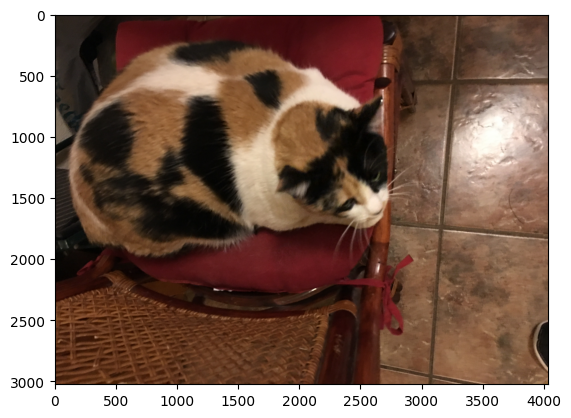

In [140]:
# Get a picture of Hunter the Cat
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Hunter.JPG')
plt.imshow(img)

*  Convert the image to grayscale so we don't need to use RGB Channels

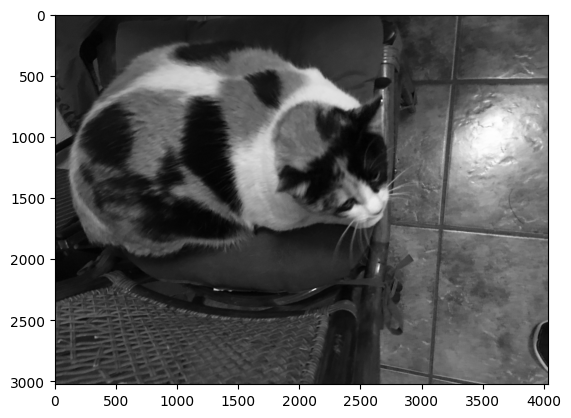

In [141]:
huntergrey = img.convert('LA')
plt.imshow(huntergrey)

*  Now we can convert the data imto a numpy matrix

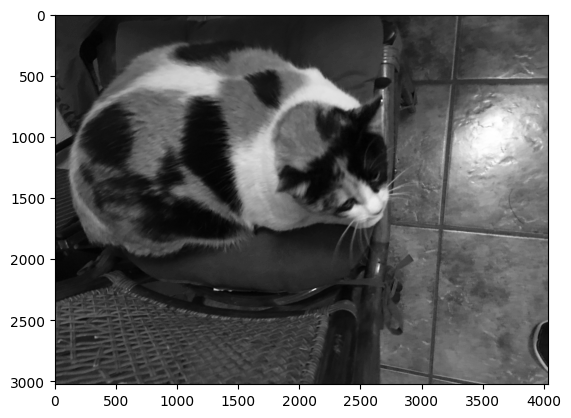

In [142]:
huntermat = np.array(list(huntergrey.getdata(band=0)), float)
huntermat.shape = (huntergrey.size[1], huntergrey.size[0])
huntermat = np.matrix(huntermat)
plt.imshow(huntermat, cmap='gray')

*  To compress this image we are going to calculate the singular value decomposition (SVD).

In [143]:
U, sigma, V = np.linalg.svd(huntermat)

*  Just as the eigenvalues are arranged in descending order in $diag{(\lambda)}$ so are the singular values by convention, arranged in descending order in $\matrix{D}$ (we use $diag{(\sigma)}$ in this example). Therefore, the first left-singular vector of $\matrix{U}$ and the first right-singular vector of $\matrix{V}$ may represent the most prominent feature of the image:

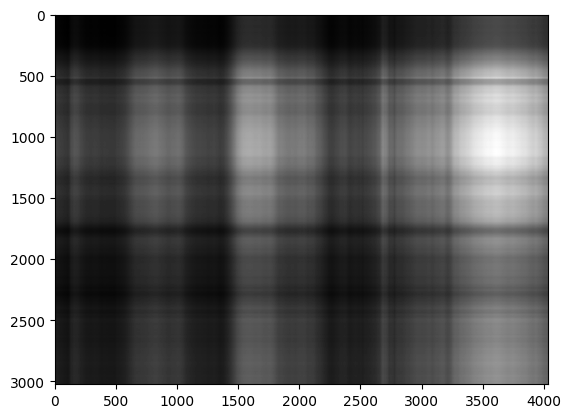

In [144]:
hunter_reconst = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(hunter_reconst, cmap='gray')

*  Adding additional singular vectors improve the quality of the image:

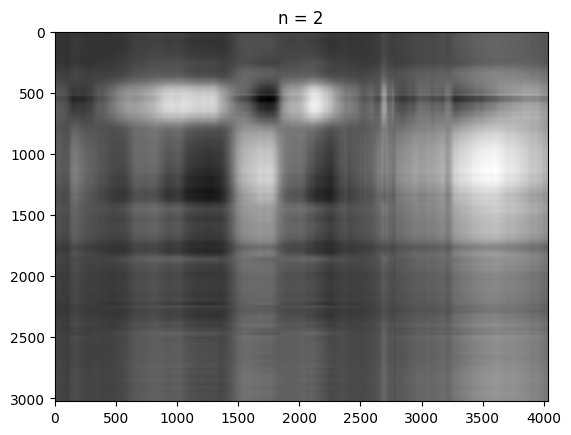

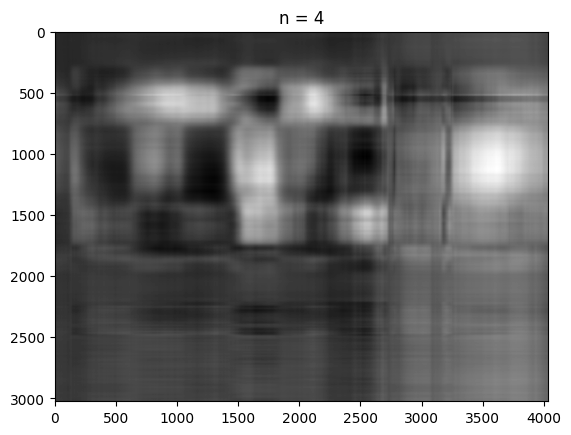

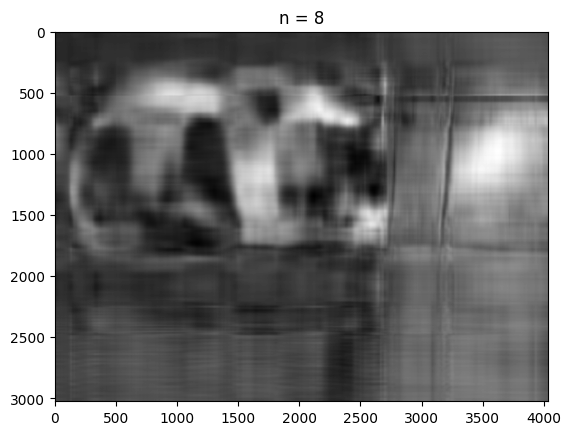

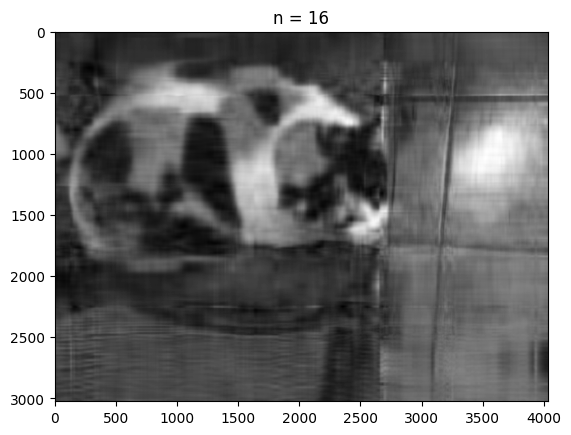

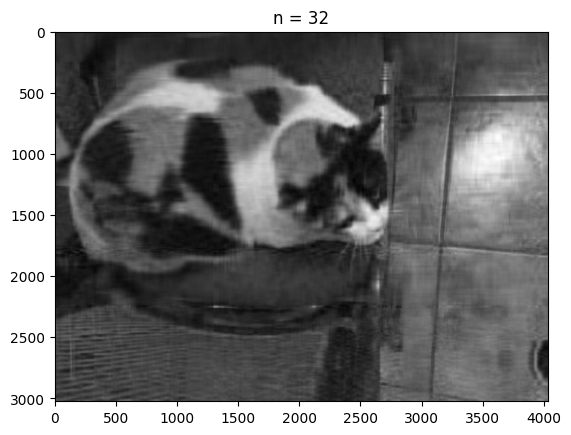

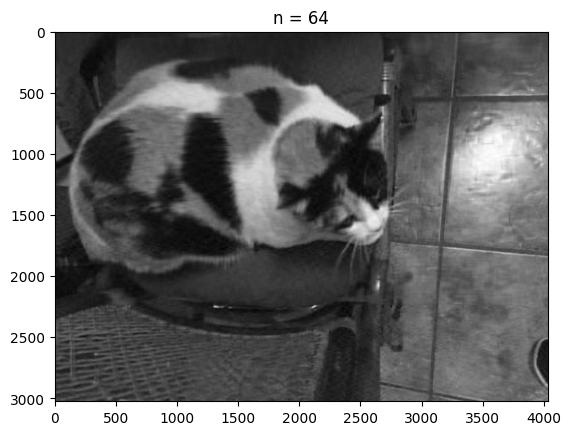

In [145]:
for i in [2, 4, 8, 16, 32, 64]:
  hunter_reconst = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
  plt.imshow(hunter_reconst, cmap='gray')
  title = "n = %s" % i
  plt.title(title)
  plt.show()

*  With 64 singular vectors, the image is reconstructed well and the data footprint is much smaller than the original image:

In [146]:
huntermat.shape # original image

(3024, 4032)

In [147]:
full_representation = 3024 * 4032 # the original image has over 12 million pixels
full_representation

12192768

In [148]:
# The SVD64 is much smaller but still gives a good representation
svd64_rep = (64 * 3024) + 64 + (64 * 4032)
svd64_rep # the svd64 only has about 452 thousand pixels

451648

In [149]:
# The image represented as 64 singular vectors is 3.7% of the size of the original image.
svd64_rep / full_representation

0.037042286050222556

* This SVD process of compression can be used for images, videos, sound or any type of media file.

#### The Moore-Penrose Pseudoinverse

*  Remember that with matrix inversion we can only solve for unknowns if we have a square matrix. Where: $n_{row} = n_{col}$ (i.e., 'vector span' = 'matrix range').
  *  This avoids **overdetermination**: $n_{row}$(# of equations) $\gt$ $n_{col}$ (# of dimensions) -> no unique solution.
  *  This avoids **underdetermination**: $n_{row} \lt n_{col}$ -> no intersecting lines due to lack of equations.
* The matrix inverse can only be calculated if the matrix is not singular(i.e., all columns are linearly indenpendent) -> parallel lines or lines that are on top of each other.
  *  For example, if a column is [1, 2], then another cannot be [2, 4] or also be [1, 2].
* However, we can use the **Moore-Penrose Pseudoinverse** to solve those matrices that cannot be inverted.

##### The Moore-Penrose Pseudoinverse
*  For some matrix $\matrix{A}$, its pseudoinverse $\matrix{A^+}$ can be computed by:
\begin{equation*}
\matrix{A^+} = \matrix{V}{D^+}{U^T}
\end{equation*}
  Where:
    *  $\matrix{U}$, $\matrix{D}$, and $\matrix{V}$ are the SVD of $\matrix{A}$
    *  $\matrix{D^+}$ = $(\matrix{D} \text{with reciprocal of all non-zero elements})^T$

In [150]:
# Calculate the pseudoinverse A+ of some matrix A using the above formula
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [151]:
# First calculate the SVD of A
U, d, VT = np.linalg.svd(A)

In [152]:
U # left singular matrix U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [153]:
VT # transposed right singular matrix V

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [154]:
d # singular value vector d

array([8.66918448, 4.10429538])

In [155]:
# To create D+ we invert the non-zero values of d:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [156]:
1/8.67

0.11534025374855825

In [158]:
1/4.10

0.24390243902439027

In [159]:
# We can take the inverse of D and this will invert the non-zero values of D and transpose it.
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [161]:
# We need to change the dim of D+ so we can do matrix mul with V and D+ to get A+.
A.shape[0]

3

In [162]:
A.shape[1]

2

In [163]:
Dplus = np.zeros((3, 2)).T # create zero matrix
Dplus

array([[0., 0., 0.],
       [0., 0., 0.]])

In [164]:
Dplus[:2, :2] = Dinv # add Dinv along diagonal
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [165]:
# Now we can perform the matrix multiplication to get A+
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [166]:
# Numpy has a pinv function so we don't have to do these calculations
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

#### Regression using Pseudoinversion
